<p style="font-size:40px;">Spotify Data Analysis Project</p>

# 🎧 Introduction

## This project explores a personal listening history dataset exported from Spotify. The CSV file, spotify_history.csv, contains detailed information about individual playback sessions, including timestamps, track titles, artist names, duration played (in milliseconds), and other relevant metadata. The goal of this analysis is to uncover meaningful patterns in listening habits — such as top artists, most-played songs, peak listening hours, and daily or seasonal trends. By cleaning, transforming, and visualizing the data, we aim to generate insights into music preferences and user behavior over time, while also practicing core data analysis techniques using Python, Pandas, and Matplotlib.


# Importing DataSets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
location = r"C:\Users\Administrator\Desktop\spotify_history.csv"
df = pd.read_csv(location)

# 🧠 Extracting Information

## To prepare the dataset for analysis, we extracted additional insights from the existing columns. This process involved transforming raw data into more meaningful features that allow for deeper exploration and pattern detection.

## For example:

    Datetime Parsing: The timestamp (ts) column was converted from string format into Python datetime objects. This enabled us to extract dates, times, day of week, hour of the day, and other temporal components for time-based analysis.

    Duration Conversion: The ms_played column, which originally represented the duration of each play session in milliseconds, was converted into seconds for better readability and interpretation.

    Missing Value Handling: We also cleaned the data by filling in or flagging missing values (e.g., reasons for playback start) to maintain the integrity of our analysis.

In [5]:
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [6]:
df.sample(3)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
60952,0vC5MmnhcAZpKeuI1HhcYA,2019-10-14 21:27:11,android,1202,Hold On To What You Believe,Mumford & Sons,Sigh No More,fwdbtn,backbtn,True,False
116084,0HTFDQQb7auJ2dZwXtPK5e,2022-03-10 04:22:29,android,260466,Host of a Ghost,Porter,Atemahawke,trackdone,trackdone,False,False
69805,5UimLzrkc72ST1fQRuwQKs,2020-04-07 17:31:20,cast to device,345254,Everything Will Be Alright,The Killers,Hot Fuss,trackdone,trackdone,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [8]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [9]:
df.shape

(149860, 11)

In [10]:
df.describe

<bound method NDFrame.describe of              spotify_track_uri                   ts    platform  ms_played  \
0       2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1       1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2       487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3       5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4       0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   
...                        ...                  ...         ...        ...   
149855  4Fz1WWr5o0OrlIcZxcyZtK  2024-12-15 23:06:19     android       1247   
149856  0qHMhBZqYb99yhX9BHcIkV  2024-12-15 23:06:21     android       1515   
149857  0HHdujGjOZChTrl8lJWEIq  2024-12-15 23:06:22     android       1283   
149858  7peh6LUcdNPcMdrSH4JPsM  2024-12-15 23:06:23     android       1306   
149859  6iGU74CwXuT4XVepjc9Emf  2024-12-15 23:06:25     android       1893   

                             

# Convert 'ts' column into datetime for analyzing purposes

In [11]:
df['ts'] = pd.to_datetime(df['ts'])
df['date'] = df['ts'].dt.date
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day
df['month'] = df['ts'].dt.month

In [12]:
df['day'].sample(3)

74388    19
99046     1
91422    20
Name: day, dtype: int32

In [13]:
df.dtypes

spotify_track_uri            object
ts                   datetime64[ns]
platform                     object
ms_played                     int64
track_name                   object
artist_name                  object
album_name                   object
reason_start                 object
reason_end                   object
shuffle                        bool
skipped                        bool
date                         object
hour                          int32
day                           int32
month                         int32
dtype: object

# Remove ms_played equal to zero

In [14]:
df = df[df['ms_played'] > 0].copy()


# Convert 'ms_played to minutes'

In [15]:
df['seconds_played'] = (df['ms_played'] / 1000 ).round(3)

In [16]:
df['seconds_played'].head(20)

0       3.185
1      61.865
2     285.386
3     134.022
5      63.485
7       1.268
10     67.587
11     12.846
12     36.132
13     95.817
14      1.763
15     45.712
16    228.021
17    229.589
18      7.332
19    217.935
20     76.303
21     10.579
23     81.893
25    238.837
Name: seconds_played, dtype: float64

# Check for Null Values

In [17]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         134
reason_end           110
shuffle                0
skipped                0
date                   0
hour                   0
day                    0
month                  0
seconds_played         0
dtype: int64

In [18]:
df['reason_start'].head(10)



0      autoplay
1      clickrow
2      clickrow
3     trackdone
5      clickrow
7       nextbtn
10     clickrow
11     clickrow
12     clickrow
13     clickrow
Name: reason_start, dtype: object

# Replacing Null Values

In [19]:
df['reason_start']  = df['reason_start'].fillna('missing')
df['reason_end'] = df['reason_end'].fillna('missing')

In [20]:
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
date                 0
hour                 0
day                  0
month                0
seconds_played       0
dtype: int64

# ⏱️ Summary Statistics: Playback Duration

## To understand overall listening behavior, we calculated several summary statistics from the seconds_played column, which represents the duration (in seconds) that each track was played:

    Total Seconds Played: The sum of all playback durations, giving us the total time spent listening to music during the period covered by the dataset.

    Mean (Average) Duration: The average amount of time a track was played. This helps identify whether full tracks are typically played or if listening sessions are shorter.

    Median Duration: The midpoint of all durations, which is useful for understanding the central tendency of playback without being skewed by outliers.

    Maximum Duration: The longest single playback session, indicating the most time spent on one track in a single instance.

    Minimum Duration: The shortest recorded playback, which could represent skipped or partially played tracks.

In [21]:
total_seconds_played = df['seconds_played'].sum()
print(f"total seconds played : {total_seconds_played}")
mean_seconds_played = df['seconds_played'].mean()
print(f"mean of seconds played : {round(mean_seconds_played, 3)}")
median_seconds_played = df['seconds_played'].median()
print(f"median of seconds played : {median_seconds_played}")
max_seconds_played = df['seconds_played'].max()
print(f"max seconds played : {max_seconds_played}")
min_seconds_played = df['seconds_played'].min()
print(f"min seconds played : {min_seconds_played}")

total seconds played : 19229530.935
mean of seconds played : 131.595
median of seconds played : 144.773
max seconds played : 1561.125
min seconds played : 0.001


# 🎵 Track and Artist Overview

## In this part of the analysis, we calculated two key metrics to understand the diversity and volume of the user's listening habits:

    Total Tracks Played: This is the total number of individual track entries in the dataset, including repeated plays. It represents how many songs were listened to overall, regardless of repetition.

    Unique Artists: This counts the number of distinct artists across all listening sessions. It provides insight into how varied the user's music taste is — whether they listen to a broad range of artists or concentrate on a few favorites.

In [22]:
count_total_tracks = df['track_name'].count()
print(f" total tracks: {count_total_tracks}")
count_unique_artists = df['artist_name'].nunique()
print(f" total_artists : {count_unique_artists}")

 total tracks: 146127
 total_artists : 4079


# 💻 Tracks Per Platform

To gain insight into which platforms were most commonly used for music playback, we grouped the data by the platform column and counted the number of tracks played on each.

This revealed how many songs were streamed from each device or environment — such as mobile, desktop, web player, or other Spotify-supported platforms. This type of grouping helps identify user preferences for listening environments and can also uncover patterns in platform usage over time.

In [23]:
tracks_per_platform = df.groupby('platform')['track_name'].count()
print(f"Tracks per platform :\n {tracks_per_platform}")

Tracks per platform :
 platform
android           136355
cast to device      3803
iOS                 2973
mac                 1175
web player           202
windows             1619
Name: track_name, dtype: int64


# 🕒 Time-Based Listening Patterns

## To better understand when the user tends to listen to music, we performed a temporal analysis by grouping the data by both day of the week and hour of the day:

    Daily Listening Behavior:
    We grouped the data by the day column (e.g., Monday to Sunday) and summed the total seconds played on each day. This revealed which days of the week had the most listening activity — for example, whether weekends or weekdays dominate music consumption.

    Hourly Listening Behavior:
    Similarly, we grouped by the hour column (ranging from 0 to 23) to identify peak listening hours throughout the day. This helps uncover trends such as morning routines, workday focus periods, or late-night music sessions.

total seconds per day played : 
 day
1     763876.788
2     750568.130
3     627140.899
4     609006.499
5     590753.484
6     635811.733
7     671304.672
8     619574.014
9     615804.888
10    629628.354
11    542670.067
12    653683.643
13    688354.486
14    585969.377
15    647978.622
16    590143.763
17    657097.008
18    564115.507
19    598530.225
20    665539.536
21    851395.328
22    767957.748
23    676582.122
24    621910.952
25    527749.635
26    544583.424
27    532649.318
28    614710.068
29    613543.974
30    452888.942
31    318007.729
Name: seconds_played, dtype: float64


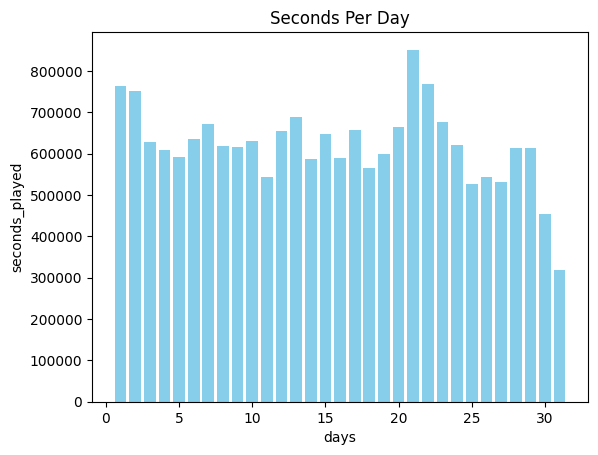

total seconds per hour played : hour
0     1312203.073
1     1152781.434
2     1042453.971
3      995115.661
4      843056.241
5      823795.162
6      806886.094
7      510276.198
8      302125.757
9      208856.355
10     149635.971
11     106475.849
12     105299.849
13     228272.369
14     408869.071
15     563763.786
16     984231.663
17    1381863.288
18    1383650.073
19    1268453.764
20    1300076.136
21    1103120.343
22    1010028.440
23    1238240.387
Name: seconds_played, dtype: float64


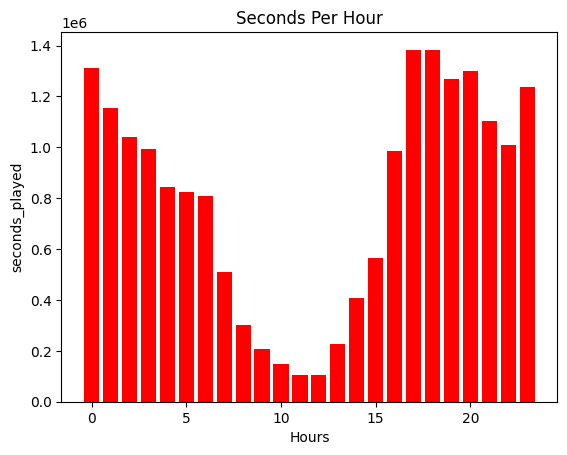

In [26]:
daily_total = df.groupby('day')['seconds_played'].sum()
print(f"total seconds per day played : \n {daily_total}")
plt.bar(daily_total.index, daily_total.values, color = 'skyblue')
plt.title('Seconds Per Day')
plt.xlabel('days')
plt.ylabel('seconds_played')
plt.show()
print('==='*20)
hourly_total = df.groupby('hour')['seconds_played'].sum()
print(f"total seconds per hour played : {hourly_total}")
plt.bar(hourly_total.index, hourly_total.values, color = 'red')
plt.title('Seconds Per Hour')
plt.xlabel('Hours')
plt.ylabel('seconds_played')
plt.show()

# 📱 Platform-Based Daily Listening Analysis
## To examine user activity across different platforms and how it evolves over time, we grouped the listening data by both day and platform, then calculated the total listening duration in seconds for each combination.
## 🔹 Daily Platform Totals
### By grouping the data by the day and platform columns, we created a summary of total seconds_played per platform per day. This allows us to track usage patterns for each platform—whether desktop, mobile, or others—across different dates.
## 🔹 Pivoted View for Comparison
### The resulting data was reshaped using a pivot table with day as the index and platform as the columns. This provides an intuitive matrix to compare platform usage side-by-side across days, revealing trends such as:
### - Which platforms dominate on specific weekdays or weekends
### - Whether usage shifts based on the day (e.g. mobile rising on weekends, desktop on weekdays)
### - Overall platform performance trends over time


In [31]:
# Group by date and platform, then sum seconds_played
daily_platform_seconds = df.groupby(['day', 'platform'])['seconds_played'].sum().reset_index()

# Optional: Pivot for easier visualization
pivot_df = daily_platform_seconds.pivot(index='day', columns='platform', values='seconds_played')

print(pivot_df)

platform     android  cast to device        iOS        mac  web player  \
day                                                                      
1         684002.768       65523.534   2779.935        NaN         NaN   
2         671736.702       27570.032  20591.522  16316.379         NaN   
3         555541.860       21524.222  19422.639  25730.089         NaN   
4         554418.064       21438.271  10676.071  14450.180         NaN   
5         534428.065       11901.879  44423.540        NaN         NaN   
6         575613.844       20183.552  21423.943  13120.379         NaN   
7         602768.606       22117.408  27542.158  11127.068         NaN   
8         539434.790       16164.731  19941.013  24930.009    6611.670   
9         500403.457       30663.093  28023.366  18779.498   18492.706   
10        556375.581       15785.528  34978.327  10615.034       1.826   
11        521474.080        4150.834   6223.095  10365.531         NaN   
12        616651.911        4609.164  

# 📊 Platform Usage Distribution
## To get a high-level view of user engagement across different platforms, we aggregated the total listening time (seconds_played) and visualized the share each platform holds.
## 🔹 Total Playtime by Platform
## We grouped the dataset by the platform column and summed the seconds_played, revealing the overall listening duration contributed by each platform. This highlights which platforms drive the most music consumption—whether mobile apps, desktop clients, or web players.
## 🔹 Pie Chart Visualization
### The data was then visualized using a pie chart to display each platform’s proportion of total listening time:
### - Each slice represents a platform.
### - Labels indicate the platform name.
### - Percentage values provide a quick glance at usage share.
### The circular layout ensures a balanced and easy-to-read format, perfect for conveying relative engagement across platforms at a glance.


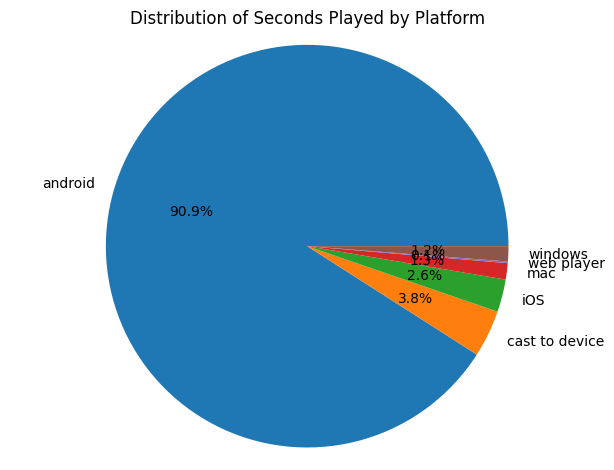

In [33]:
seconds_played_per_platform = df.groupby('platform')['seconds_played'].sum()

seconds_played_per_platform
# Plot pie chart
plt.pie(
    seconds_played_per_platform.values,
    labels=seconds_played_per_platform.index,
    autopct='%1.1f%%'
)

plt.title('Distribution of Seconds Played by Platform')
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()

# 🎵 Top 10 Most-Played Songs
## To highlight user favorites, we summed the total listening time for each track using the track_name column. After sorting the songs by their accumulated seconds_played, we extracted the top 10—revealing the most popular tracks based on actual play duration.
## This metric provides a strong signal of listening engagement, spotlighting the tracks that users return to again and again.


In [35]:
top_10_songs = df.groupby('track_name')['seconds_played'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 Songs by seconds played : \n{top_10_songs}")

Top 10 Songs by seconds played : 
track_name
Ode To The Mets                                                                        67431.580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401.661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756.730
19 Dias y 500 Noches - En Directo                                                      42914.042
In the Blood                                                                           38427.087
Claudia's Theme - Version Eight                                                        37120.900
Dying Breed                                                                            36182.653
The Breaking of the Fellowship (feat. "In Dreams")                                     35990.898
All These Things That I've Done                                                        35754.915
Caution                                                                           

# 🎤 Top 10 Most-Played Artists
## To spotlight the music creators with the highest engagement, we summed up total listening time (seconds_played) per artist_name. By sorting these totals in descending order and selecting the top 10, we surfaced the most popular artists based on how long users spent listening to their music.


In [36]:
top_10_artists = df.groupby('artist_name')['seconds_played'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 Bands or Artists played by time : \n{top_10_artists}")

Top 10 Bands or Artists played by time : 
artist_name
The Beatles           1210184.552
The Killers           1059556.516
John Mayer             725219.443
Bob Dylan              569456.396
Paul McCartney         357354.370
Howard Shore           348930.675
The Strokes            317508.419
The Rolling Stones     307917.009
Pink Floyd             260531.842
Led Zeppelin           248338.279
Name: seconds_played, dtype: float64


# 🚫 Top 10 Most-Skipped Songs
## To uncover which tracks users were least likely to finish, we filtered the dataset for entries where the skipped flag was True. Then, we grouped by track_name and counted the number of skips per song.
## By sorting these counts in descending order and selecting the top 10, we surfaced the songs that most frequently prompted users to hit "next."


In [37]:
skipped_songs = df[df['skipped'] == True]
top_10_most_skipped_songs = skipped_songs.groupby('track_name').size().sort_values(ascending = False).head(10)
print(f"Top 10 Most skipped Songs : {top_10_most_skipped_songs} ")

Top 10 Most skipped Songs : track_name
Paraíso                                              29
Superheroes                                          20
Photograph                                           19
Old Thing Back (feat. Ja Rule and Ralph Tresvant)    19
Switzerland                                          19
What Do You Mean?                                    18
Drag Me Down                                         18
Diez Mil Maneras                                     16
Queen of Hearts                                      14
Stitches                                             14
dtype: int64 


# 🧭 Start Reason Percentage Distribution
## To uncover how tracks are typically initiated during listening sessions, we analyzed the reason_start column and calculated the percentage share of each start reason.
## 🔹 Aggregation of Start Reasons
### Using value_counts(normalize=True), we determined how often each start reason appears—whether it's user-driven, playlist-based, autoplay, or any other trigger. The result is a percentage-based summary, reflecting the relative prominence of each initiation method.
## 🔹 Bar Chart Visualization
### The data was plotted as a bar chart, with:
### - Each bar representing a different start reason.
### - Bar heights corresponding to their percentage share.
### - Clear labeling and rotation for readability.


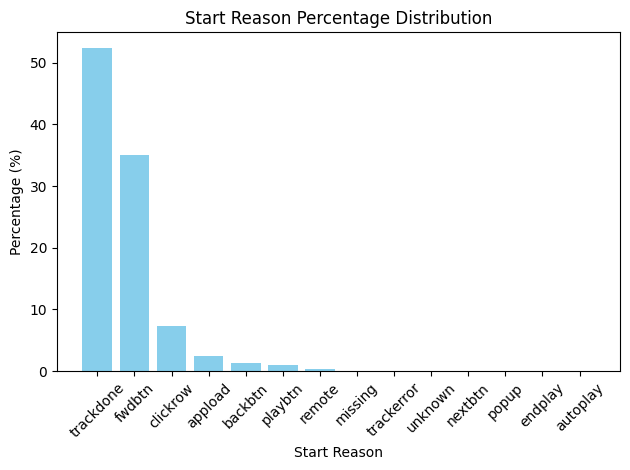

In [48]:
# Count how many times each start reason appears
start_reason_counts = df['reason_start'].value_counts(normalize=True) * 100

# Plot bar chart
plt.bar(start_reason_counts.index, start_reason_counts.values, color='skyblue')
plt.title('Start Reason Percentage Distribution')
plt.xlabel('Start Reason')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()